In [1]:
import utils.json_to_df as j
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tier_name = "Ultimate"
additional_fields = {
    "f2p": ["flags", "f2p"],
    "release": ["basic_info", "original_release_date"],
}

df = j.get_collapsed_df(tier_name, additional_fields=additional_fields)
df.head(10)

,base_id,title,pid,added,removed,f2p,release
0,10.0,Jade Empire: Special Edition,9PJFC8RLNPH5,2021-03-18,NaT,False,2007-02-27
1,13.0,Fallout: A Post Nuclear Role Playing Game,9N42CT1J5WGW,2021-06-13,NaT,False,1997-10-10
2,14.0,Fallout 2,9P1JS86M9SXH,2021-06-13,NaT,False,1998-10-29
3,15.0,Fallout 3,9NBZ9JF6TFMD,2021-06-13,NaT,False,2008-10-28
4,16.0,Fallout: New Vegas,BX3JNK07Z6QK,2019-10-17,NaT,False,2010-10-19
5,17.0,Fallout Tactics: Brotherhood of Steel,9NDV7FRVD7ML,2021-06-13,NaT,False,2001-03-15
6,20.0,BioShock,BTBMZQ3FM2V8,2017-06-01,2018-05-02,False,2007-08-21
7,21.0,BioShock 2,BVXR4C8LTHS1,2017-06-01,2018-05-03,False,2010-02-09
8,35.0,Dungeon Keeper,9PKDX735TR8K,2021-03-18,NaT,False,1997-06-26
9,36.0,Dungeon Keeper 2,9NGL4GBPXM1G,2021-03-18,NaT,False,1999-06-25


In [3]:
df.release = pd.to_datetime(df.release, format="%Y-%m-%d", errors="coerce")


In [ ]:
df2=df[(df.added==df.release)&(df.release>=pd.to_datetime("2025-10-01"))&(df.release<=pd.to_datetime("2025-11-30"))&(df.f2p>)].sort_values(by="release",ascending=True).reset_index(drop=True)
df2.index+=1
df2.head(75)

,base_id,title,pid,added,removed,f2p,release
1,197073.0,Sopa: Tale of the Stolen Potato,9N221ZTFGQB0,2025-10-07,NaT,False,2025-10-07
2,325176.0,Little Rocket Lab,9N3M5D5ZSW34,2025-10-07,NaT,False,2025-10-07
3,346035.0,Ball x Pit,9MWXF3SRD7QN,2025-10-15,NaT,False,2025-10-15
4,348217.0,Keeper,9NCJWHHMVHR0,2025-10-17,NaT,False,2025-10-17
5,329130.0,Ninja Gaiden 4,9N7358JZPX1Z,2025-10-21,NaT,False,2025-10-21
6,210624.0,Bounty Star,9P66TM1HLGLX,2025-10-23,NaT,False,2025-10-23
7,335439.0,PowerWash Simulator 2,9P45GGDTFNSM,2025-10-23,NaT,False,2025-10-23
8,235823.0,Super Fantasy Kingdom,9MZ8B96NDG1T,2025-10-24,NaT,False,2025-10-24
9,117000.0,Superball,9N4M72L6KGC8,2025-10-28,NaT,True,2025-10-28
10,152246.0,The Outer Worlds 2,9P8RMKXRML7D,2025-10-29,NaT,False,2025-10-29


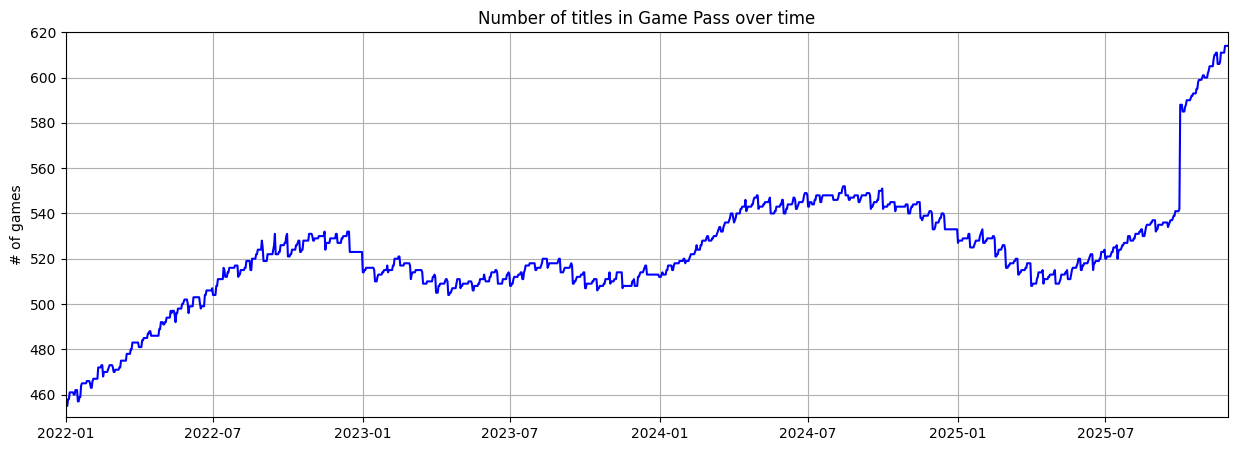

In [4]:
# Total available titles
def count_available_titles(target_date):
    """Returns the count of available titles on a given date."""
    available_titles = df[
        (df["added"] <= target_date)
        & ((df["removed"].isna()) | (df["removed"] > target_date))
        & (df.f2p != 1)
    ]
    return len(available_titles)


# Generate a date range for visualization
start_date = df["added"].min()
end_date = pd.Timestamp.today()  # or max(df["left"].dropna()) for last known date
date_range = pd.date_range(start=start_date, end=end_date, freq="D")

# Compute availability counts for each date
available_counts = np.array([count_available_titles(date) for date in date_range])
available_counts +=7

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(
    date_range,
    available_counts,
    color="blue",
)
plt.ylabel("# of games")
plt.xlim(pd.to_datetime("2022-01-01"), end_date)
plt.ylim(450, 620)
plt.title("Number of titles in Game Pass over time")
plt.grid(True)
plt.show()

C:\Users\pawel\AppData\Local\Temp\ipykernel_1408\890342176.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Year"] = df2["added"].dt.year
C:\Users\pawel\AppData\Local\Temp\ipykernel_1408\890342176.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Month"] = df2["added"].dt.strftime("%B")  # Full month name


<Figure size 1500x600 with 0 Axes>

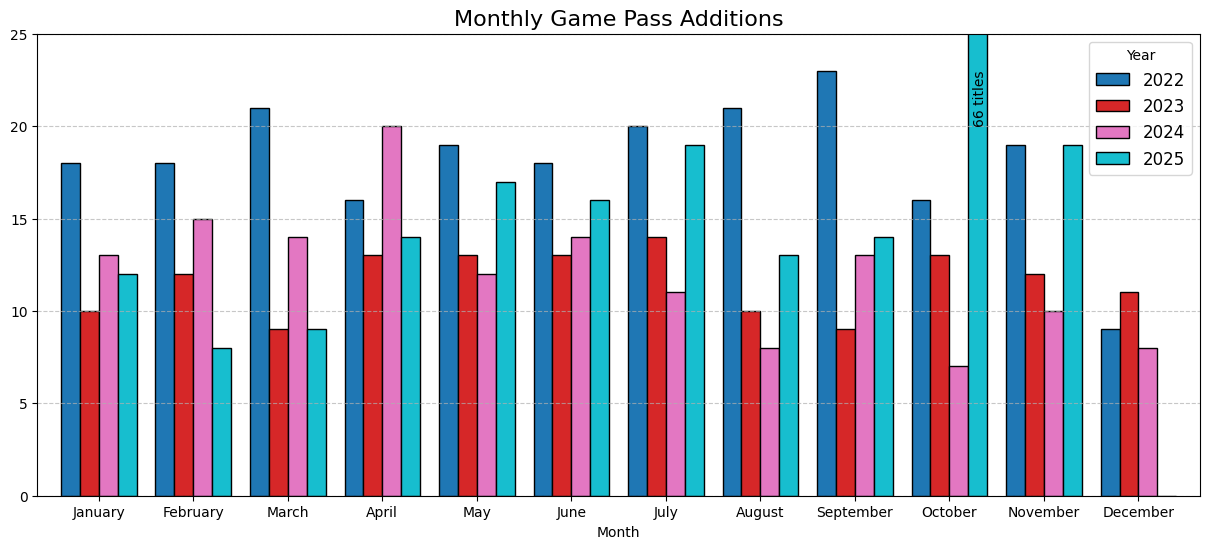

In [5]:
# Monthly additions 2022 - Sep 2025

# Filter the DataFrame for the specified date range
start_date = "2022-01-01"
end_date = "2025-11-30"
df2 = df[(df["added"] >= start_date) & (df["added"] <= end_date) & (df["f2p"] != 1)]


# Extract year and month name
df2["Year"] = df2["added"].dt.year
df2["Month"] = df2["added"].dt.strftime("%B")  # Full month name

# Count occurrences per (Month, Year)
month_counts = df2.groupby(["Month", "Year"]).size().reset_index(name="Count")

month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

month_counts["Month"] = pd.Categorical(
    month_counts["Month"], categories=month_order, ordered=True
)

# Pivot the data so that each year becomes a separate column
pivot_data = month_counts.pivot(index="Month", columns="Year", values="Count").fillna(0)


# Plot
plt.figure(figsize=(15, 6))
pivot_data.plot(
    kind="bar", width=0.8, figsize=(15, 6), colormap="tab10", edgecolor="black"
)

plt.title("Monthly Game Pass Additions", fontsize=16)
plt.xticks(rotation=0)
plt.legend(title="Year", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.ylim(0,25)
plt.text(9.25, 20, "66 titles", rotation=90, va='bottom', ha='left')
plt.show()

C:\Users\pawel\AppData\Local\Temp\ipykernel_1408\1214198259.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Year"] = df2["added"].dt.year
C:\Users\pawel\AppData\Local\Temp\ipykernel_1408\1214198259.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Month"] = df2["added"].dt.strftime("%B")  # Full month name


<Figure size 1500x600 with 0 Axes>

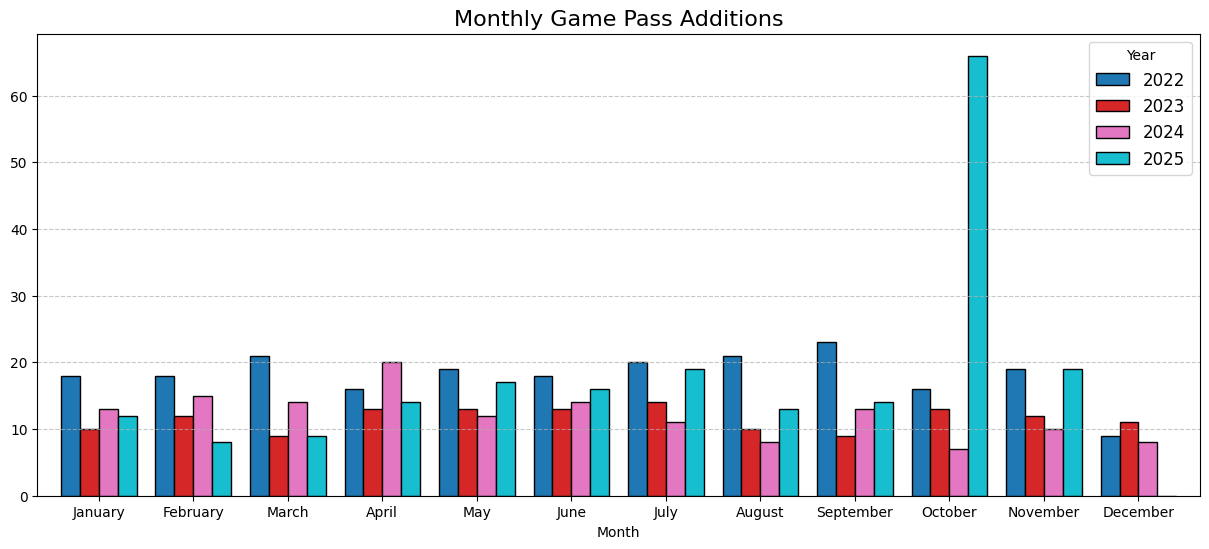

In [ ]:
# Monthly additions 2022 - Sep 2025

# Filter the DataFrame for the specified date range
start_date = "2022-01-01"
end_date = "2025-11-30"
df2 = df[(df["added"] >= start_date) & (df["added"] <= end_date) & (df["f2p"] != True)]


# Extract year and month name
df2["Year"] = df2["added"].dt.year
df2["Month"] = df2["added"].dt.strftime("%B")  # Full month name

# Count occurrences per (Month, Year)
month_counts = df2.groupby(["Month", "Year"]).size().reset_index(name="Count")

month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

month_counts["Month"] = pd.Categorical(
    month_counts["Month"], categories=month_order, ordered=True
)

# Pivot the data so that each year becomes a separate column
pivot_data = month_counts.pivot(index="Month", columns="Year", values="Count").fillna(0)


# Plot
plt.figure(figsize=(15, 6))
pivot_data.plot(
    kind="bar", width=0.8, figsize=(15, 6), colormap="tab10", edgecolor="black"
)

plt.title("Monthly Game Pass Additions", fontsize=16)
plt.xticks(rotation=0)
plt.legend(title="Year", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

C:\Users\pawel\AppData\Local\Temp\ipykernel_1408\2914129836.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Year"] = df2["added"].dt.year
C:\Users\pawel\AppData\Local\Temp\ipykernel_1408\2914129836.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Month"] = df2["added"].dt.strftime("%B")  # Full month name


<Figure size 1500x600 with 0 Axes>

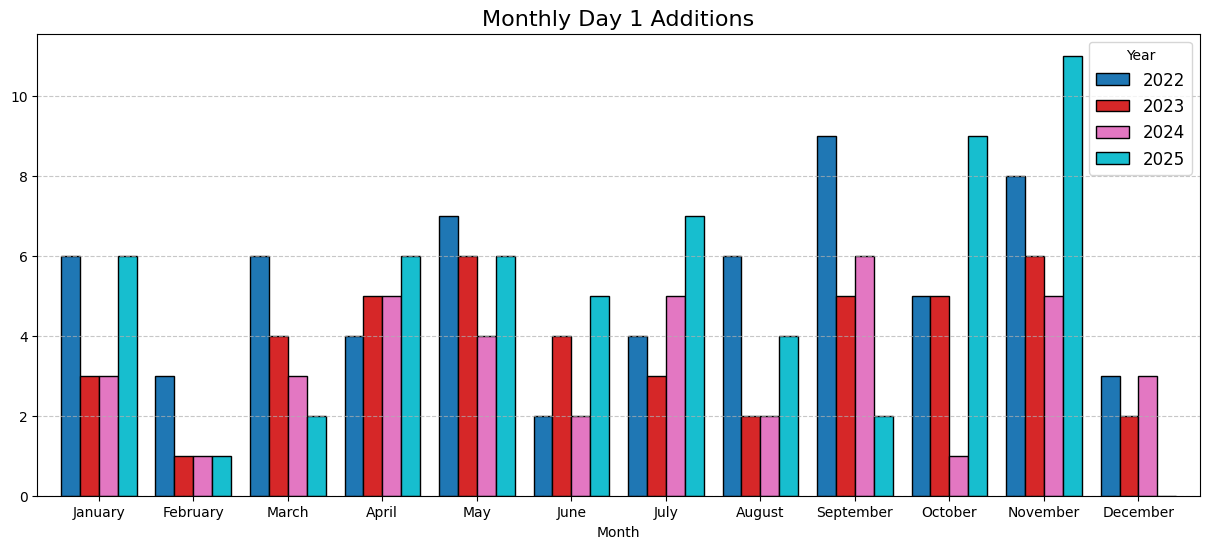

In [7]:
# Monthly day 1 additions 2022 - Sep 2025

# Filter the DataFrame for the specified date range
start_date = "2022-01-01"
end_date = "2025-11-30"
df.release = pd.to_datetime(df.release, format="%Y-%m-%d", errors="coerce")
df2 = df[
    (df["added"] >= start_date)
    & (df["added"] <= end_date)
    & (abs((df.release - df.added).dt.days) < 10)
    & (df["f2p"] != 1)
]


# Extract year and month name
df2["Year"] = df2["added"].dt.year
df2["Month"] = df2["added"].dt.strftime("%B")  # Full month name

# Count occurrences per (Month, Year)
month_counts = df2.groupby(["Month", "Year"]).size().reset_index(name="Count")

month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

month_counts["Month"] = pd.Categorical(
    month_counts["Month"], categories=month_order, ordered=True
)

# Pivot the data so that each year becomes a separate column
pivot_data = month_counts.pivot(index="Month", columns="Year", values="Count").fillna(0)


# Plot
plt.figure(figsize=(15, 6))
pivot_data.plot(
    kind="bar", width=0.8, figsize=(15, 6), colormap="tab10", edgecolor="black"
)

plt.title("Monthly Day 1 Additions", fontsize=16)
plt.xticks(rotation=0)
plt.legend(title="Year", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [8]:
additional_fields = {
    "engine": ["igdb_meta", "main", "engine"],
}
df_engines = j.get_collapsed_df("Ultimate", additional_fields=additional_fields)
result = df_engines.engine.value_counts()
result.head(10)

engine
[]                   560
[Unity]              293
[Unreal Engine 4]    189
[Unreal Engine 3]     49
[Frostbite]           37
[Unreal Engine 5]     34
[AnvilNext]           15
[Ego Engine]          12
[Frostbite 3]         11
[Telltale Tool]       10
Name: count, dtype: int64

In [ ]:
tier_name = "Ultimate"
additional_fields = {
    "f2p": ["flags", "f2p"],
    "release": ["basic_info", "original_release_date"],
    "1_0":["igdb","main","release_date_1_0"],
}

df = j.get_collapsed_df(tier_name, additional_fields=additional_fields)
df.head(10)

In [25]:
df.head(10)

,base_id,title,pid,added,removed,f2p,release
0,10.0,Jade Empire: Special Edition,9PJFC8RLNPH5,2021-03-18,NaT,False,2007-02-27
1,13.0,Fallout: A Post Nuclear Role Playing Game,9N42CT1J5WGW,2021-06-13,NaT,False,1997-10-10
2,14.0,Fallout 2,9P1JS86M9SXH,2021-06-13,NaT,False,1998-10-29
3,15.0,Fallout 3,9NBZ9JF6TFMD,2021-06-13,NaT,False,2008-10-28
4,16.0,Fallout: New Vegas,BX3JNK07Z6QK,2019-10-17,NaT,False,2010-10-19
5,17.0,Fallout Tactics: Brotherhood of Steel,9NDV7FRVD7ML,2021-06-13,NaT,False,2001-03-15
6,20.0,BioShock,BTBMZQ3FM2V8,2017-06-01,2018-05-02,False,2007-08-21
7,21.0,BioShock 2,BVXR4C8LTHS1,2017-06-01,2018-05-03,False,2010-02-09
8,35.0,Dungeon Keeper,9PKDX735TR8K,2021-03-18,NaT,False,1997-06-26
9,36.0,Dungeon Keeper 2,9NGL4GBPXM1G,2021-03-18,NaT,False,1999-06-25


C:\Users\pawel\AppData\Local\Temp\ipykernel_18964\2458401197.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['added'].dt.year
C:\Users\pawel\AppData\Local\Temp\ipykernel_18964\2458401197.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_year'] = df_filtered['added'].dt.dayofyear


IndexError: list index out of range

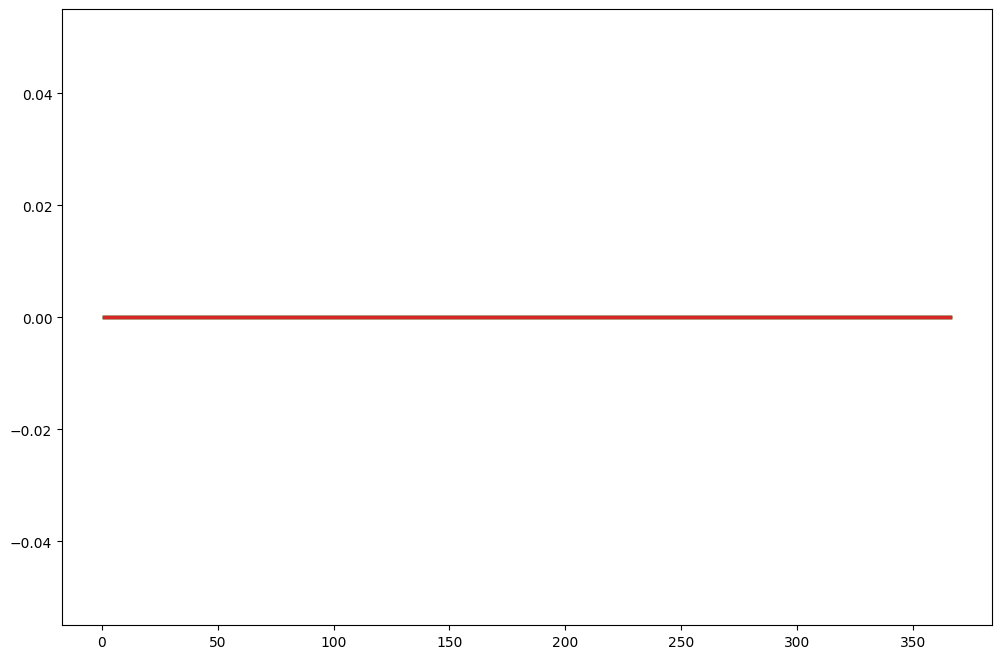

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# Read the CSV file
# df = pd.read_csv('your_file.csv')  # Replace with your actual file path

# Remove duplicates: keep only the oldest entry for each game title
df = df.sort_values('added')

# # Filter for records where '1P' column is empty (NaN or empty string)
# df_filtered = df[df['1P'].isna() | (df['1P'] == '')]

# Filter for dates starting from 2022
df_filtered = df[df['added'] >= '2022-01-01']

# Extract year and day of year for each record
df_filtered['year'] = df_filtered['added'].dt.year
df_filtered['day_of_year'] = df_filtered['added'].dt.dayofyear

# Create a dictionary to store cumulative counts for each year
years = [2022, 2023, 2024, 2025]
year_data = {}

# Process each year separately
for year in years:
    year_df = df_filtered[df_filtered['year'] == year].copy()
    
    if len(year_df) == 0:
        # If no data for this year, create empty series
        year_data[year] = pd.Series(0, index=range(1, 367))
        continue
    
    # Count titles added each day of the year
    daily_counts = year_df['day_of_year'].value_counts().sort_index()
    
    # Create complete series for all days of the year (1-366 to handle leap years)
    complete_daily = pd.Series(0, index=range(1, 367))
    complete_daily.update(daily_counts)
    
    # Calculate cumulative sum
    year_data[year] = complete_daily.cumsum()

# Convert day of year to approximate months for x-axis
# Using approximate day numbers for month boundaries
month_boundaries = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335, 366]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '']

# Create the plot
plt.figure(figsize=(12, 8))

colors = ['steelblue', 'darkgreen', 'crimson', 'darkorange']
line_styles = ['-', '-', '-', '-']

for i, year in enumerate(years):
    days = list(range(1, 367))
    cumulative_counts = year_data[year].values
    
    plt.plot(days, cumulative_counts, 
             color=colors[i], 
             linewidth=2.5, 
             linestyle=line_styles[i],
             label=f'{year}',
             marker='o' if year == 2025 else None,  # Add markers for current year
             markersize=3 if year == 2025 else 0,
             markevery=30 if year == 2025 else None)

# Customize the plot
plt.title('Cumulative Number of Titles Added Throughout Each Year', 
          fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cumulative Number of Titles', fontsize=12)
plt.grid(True, alpha=0.3)

# Set x-axis to show months
plt.xticks(month_boundaries[:-1], month_labels[:-1])

# Add legend
plt.legend(title='Year', loc='upper left', fontsize=10)

# Add vertical lines for quarter boundaries
quarter_days = [91, 182, 274]  # End of Q1, Q2, Q3
for day in quarter_days:
    plt.axvline(x=day, color='gray', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Year-end totals (cumulative titles added during each year):")
for year in years:
    year_end_total = year_data[year].iloc[-1]
    year_count = len(df_filtered[df_filtered['year'] == year])
    print(f"{year}: {year_end_total} titles (verified: {year_count} records)")

print(f"\nTotal titles analyzed across all years: {len(df_filtered)}")

# Print monthly breakdown for the most recent year with data
latest_year_with_data = max([year for year in years if year_data[year].iloc[-1] > 0])
print(f"\nMonthly progression for {latest_year_with_data}:")

monthly_data = []
for i in range(len(month_boundaries)-1):
    start_day = month_boundaries[i]
    end_day = month_boundaries[i+1] - 1
    
    start_cumsum = year_data[latest_year_with_data].iloc[start_day-1] if start_day > 1 else 0
    end_cumsum = year_data[latest_year_with_data].iloc[min(end_day-1, 365)]
    monthly_additions = end_cumsum - start_cumsum
    
    print(f"{month_labels[i]}: {int(end_cumsum)} total ({int(monthly_additions)} added)")

C:\Users\pawel\AppData\Local\Temp\ipykernel_1408\3926476164.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(years))  # 10-category color map


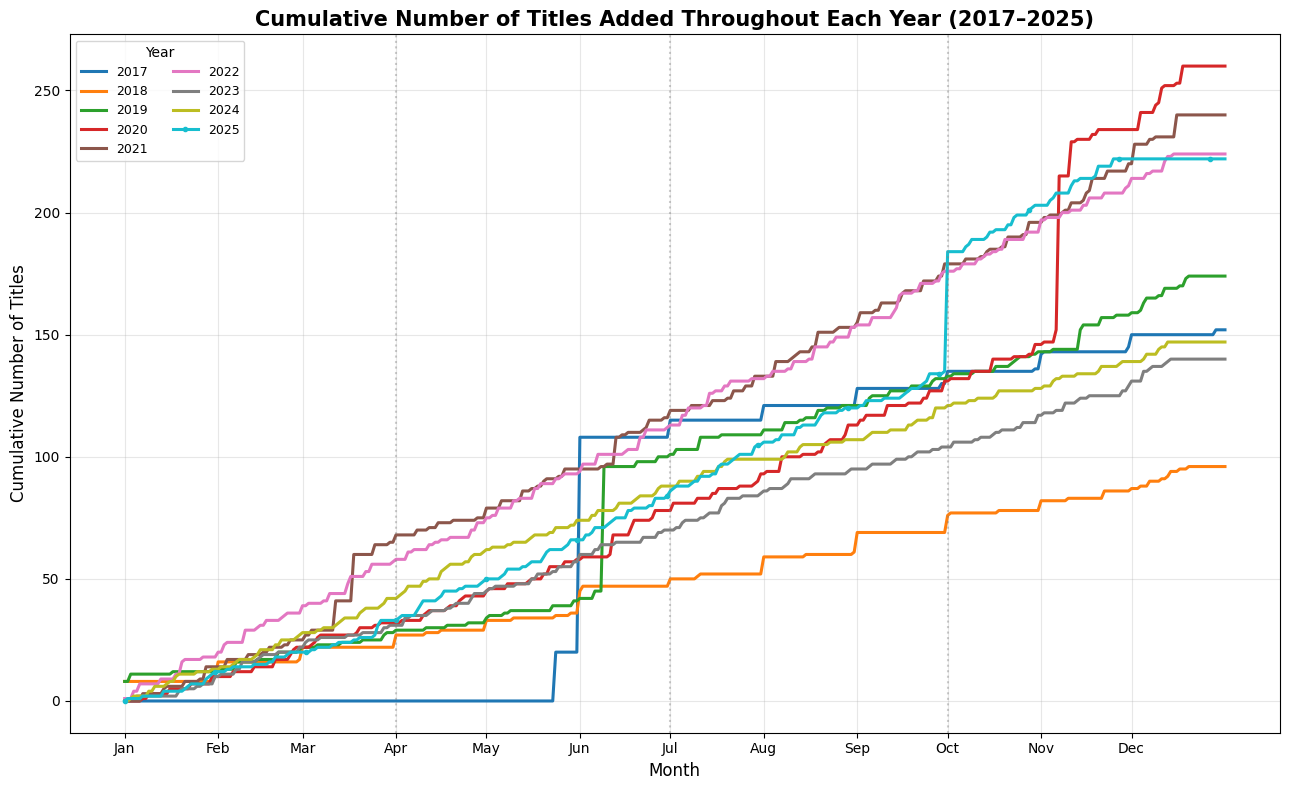

Year-end totals (cumulative titles added during each year):
2017: 152 titles (verified: 152 records)
2018: 96 titles (verified: 96 records)
2019: 174 titles (verified: 174 records)
2020: 260 titles (verified: 260 records)
2021: 240 titles (verified: 240 records)
2022: 224 titles (verified: 224 records)
2023: 140 titles (verified: 140 records)
2024: 147 titles (verified: 147 records)
2025: 222 titles (verified: 222 records)

Total titles analyzed across all years: 1656

Monthly progression for 2025:
Jan: 12 total (12 added)
Feb: 20 total (8 added)
Mar: 33 total (13 added)
Apr: 49 total (16 added)
May: 66 total (16 added)
Jun: 84 total (18 added)
Jul: 105 total (19 added)
Aug: 120 total (14 added)
Sep: 135 total (15 added)
Oct: 203 total (19 added)
Nov: 222 total (19 added)
Dec: 222 total (0 added)


In [8]:
# df is preloaded

# Remove duplicates: keep only the oldest entry for each game title
df = df.sort_values('added')

# Filter for dates starting from 2017
df_filtered = df[df['added'] >= '2017-01-01']

# Extract year and day of year
df_filtered['year'] = df_filtered['added'].dt.year
df_filtered['day_of_year'] = df_filtered['added'].dt.dayofyear

# Define range of years dynamically
years = list(range(2017, 2026))

# Prepare dictionary for cumulative counts
year_data = {}

for year in years:
    year_df = df_filtered[df_filtered['year'] == year].copy()
    
    if len(year_df) == 0:
        year_data[year] = pd.Series(0, index=range(1, 367))
        continue
    
    daily_counts = year_df['day_of_year'].value_counts().sort_index()
    complete_daily = pd.Series(0, index=range(1, 367))
    complete_daily.update(daily_counts)
    
    year_data[year] = complete_daily.cumsum()

# Approximate month boundaries for x-axis
month_boundaries = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335, 366]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '']

# Generate visually distinct colors for 9 years
# Using matplotlib’s built-in colormaps for good differentiation
import matplotlib.cm as cm
import numpy as np
colors = cm.get_cmap('tab10', len(years))  # 10-category color map

plt.figure(figsize=(13, 8))

for i, year in enumerate(years):
    days = list(range(1, 367))
    cumulative_counts = year_data[year].values
    
    plt.plot(
        days, cumulative_counts, 
        color=colors(i),
        linewidth=2.2,
        linestyle='-',
        label=str(year),
        marker='o' if year == 2025 else None,
        markersize=3 if year == 2025 else 0,
        markevery=30 if year == 2025 else None
    )

# Customize plot
plt.title('Cumulative Number of Titles Added Throughout Each Year (2017–2025)', 
          fontsize=15, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cumulative Number of Titles', fontsize=12)
plt.grid(True, alpha=0.3)

# X-axis months
plt.xticks(month_boundaries[:-1], month_labels[:-1])

# Legend
plt.legend(title='Year', loc='upper left', fontsize=9, ncol=2)

# Quarter markers
quarter_days = [91, 182, 274]
for day in quarter_days:
    plt.axvline(x=day, color='gray', linestyle=':', alpha=0.4)

plt.tight_layout()
plt.show()

# Year-end summary
print("Year-end totals (cumulative titles added during each year):")
for year in years:
    year_end_total = year_data[year].iloc[-1]
    year_count = len(df_filtered[df_filtered['year'] == year])
    print(f"{year}: {year_end_total} titles (verified: {year_count} records)")

print(f"\nTotal titles analyzed across all years: {len(df_filtered)}")

# Monthly breakdown for most recent year with data
latest_year_with_data = max([year for year in years if year_data[year].iloc[-1] > 0])
print(f"\nMonthly progression for {latest_year_with_data}:")

monthly_data = []
for i in range(len(month_boundaries)-1):
    start_day = month_boundaries[i]
    end_day = month_boundaries[i+1] - 1
    
    start_cumsum = year_data[latest_year_with_data].iloc[start_day-1] if start_day > 1 else 0
    end_cumsum = year_data[latest_year_with_data].iloc[min(end_day-1, 365)]
    monthly_additions = end_cumsum - start_cumsum
    
    print(f"{month_labels[i]}: {int(end_cumsum)} total ({int(monthly_additions)} added)")


C:\Users\pawel\AppData\Local\Temp\ipykernel_1408\720863998.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['added'].dt.year
C:\Users\pawel\AppData\Local\Temp\ipykernel_1408\720863998.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_year'] = df_filtered['added'].dt.dayofyear
C:\Users\pawel\AppData\Local\Temp\ipykernel_1408\720863998.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 

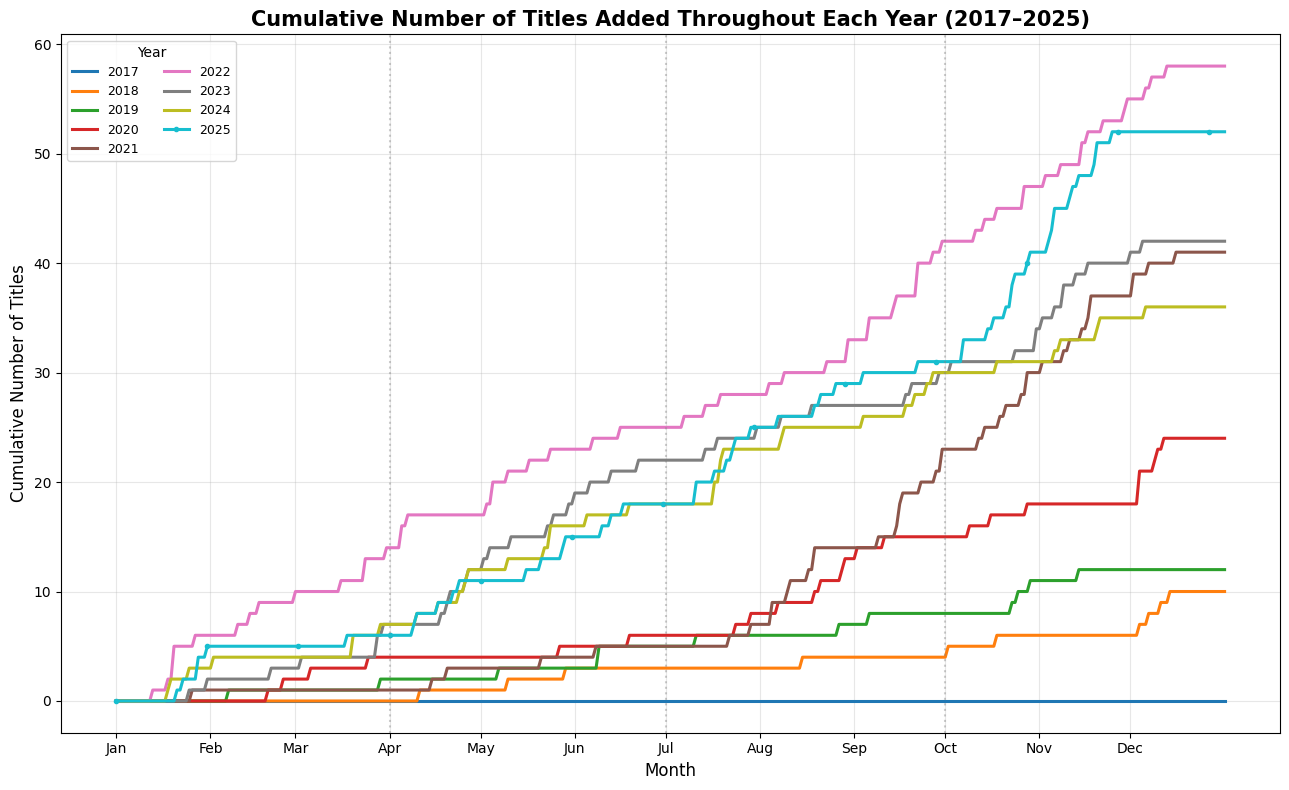

Year-end totals (cumulative titles added during each year):
2017: 0 titles (verified: 0 records)
2018: 10 titles (verified: 10 records)
2019: 12 titles (verified: 12 records)
2020: 24 titles (verified: 24 records)
2021: 41 titles (verified: 41 records)
2022: 58 titles (verified: 58 records)
2023: 42 titles (verified: 42 records)
2024: 36 titles (verified: 36 records)
2025: 52 titles (verified: 52 records)

Total titles analyzed across all years: 275

Monthly progression for 2025:
Jan: 5 total (5 added)
Feb: 5 total (0 added)
Mar: 6 total (1 added)
Apr: 11 total (5 added)
May: 15 total (4 added)
Jun: 18 total (3 added)
Jul: 25 total (7 added)
Aug: 29 total (4 added)
Sep: 31 total (2 added)
Oct: 41 total (10 added)
Nov: 52 total (11 added)
Dec: 52 total (0 added)


In [9]:
# df is preloaded

# Remove duplicates: keep only the oldest entry for each game title
df = df.sort_values('added')

# Filter for dates starting from 2017
df_filtered = df[(df['added'] >= '2017-01-01')&(df.added==df.release)]

# Extract year and day of year
df_filtered['year'] = df_filtered['added'].dt.year
df_filtered['day_of_year'] = df_filtered['added'].dt.dayofyear

# Define range of years dynamically
years = list(range(2017, 2026))

# Prepare dictionary for cumulative counts
year_data = {}

for year in years:
    year_df = df_filtered[df_filtered['year'] == year].copy()
    
    if len(year_df) == 0:
        year_data[year] = pd.Series(0, index=range(1, 367))
        continue
    
    daily_counts = year_df['day_of_year'].value_counts().sort_index()
    complete_daily = pd.Series(0, index=range(1, 367))
    complete_daily.update(daily_counts)
    
    year_data[year] = complete_daily.cumsum()

# Approximate month boundaries for x-axis
month_boundaries = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335, 366]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '']

# Generate visually distinct colors for 9 years
# Using matplotlib’s built-in colormaps for good differentiation
import matplotlib.cm as cm
import numpy as np
colors = cm.get_cmap('tab10', len(years))  # 10-category color map

plt.figure(figsize=(13, 8))

for i, year in enumerate(years):
    days = list(range(1, 367))
    cumulative_counts = year_data[year].values
    
    plt.plot(
        days, cumulative_counts, 
        color=colors(i),
        linewidth=2.2,
        linestyle='-',
        label=str(year),
        marker='o' if year == 2025 else None,
        markersize=3 if year == 2025 else 0,
        markevery=30 if year == 2025 else None
    )

# Customize plot
plt.title('Cumulative Number of Titles Added Throughout Each Year (2017–2025)', 
          fontsize=15, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cumulative Number of Titles', fontsize=12)
plt.grid(True, alpha=0.3)

# X-axis months
plt.xticks(month_boundaries[:-1], month_labels[:-1])

# Legend
plt.legend(title='Year', loc='upper left', fontsize=9, ncol=2)

# Quarter markers
quarter_days = [91, 182, 274]
for day in quarter_days:
    plt.axvline(x=day, color='gray', linestyle=':', alpha=0.4)

plt.tight_layout()
plt.show()

# Year-end summary
print("Year-end totals (cumulative titles added during each year):")
for year in years:
    year_end_total = year_data[year].iloc[-1]
    year_count = len(df_filtered[df_filtered['year'] == year])
    print(f"{year}: {year_end_total} titles (verified: {year_count} records)")

print(f"\nTotal titles analyzed across all years: {len(df_filtered)}")

# Monthly breakdown for most recent year with data
latest_year_with_data = max([year for year in years if year_data[year].iloc[-1] > 0])
print(f"\nMonthly progression for {latest_year_with_data}:")

monthly_data = []
for i in range(len(month_boundaries)-1):
    start_day = month_boundaries[i]
    end_day = month_boundaries[i+1] - 1
    
    start_cumsum = year_data[latest_year_with_data].iloc[start_day-1] if start_day > 1 else 0
    end_cumsum = year_data[latest_year_with_data].iloc[min(end_day-1, 365)]
    monthly_additions = end_cumsum - start_cumsum
    
    print(f"{month_labels[i]}: {int(end_cumsum)} total ({int(monthly_additions)} added)")


In [10]:
df2=df[(df.added==df.release)&(df.added>=pd.to_datetime("2025-11-01"))&(df.added<=pd.to_datetime("2025-11-30"))]

In [11]:
df2

,base_id,title,pid,added,removed,f2p,release
1654,365487.0,Football Manager 26,9NMNZ4CK59DM,2025-11-04,NaT,False,2025-11-04
633,25936.0,Dead Static Drive,9MXWL7VJ2SJW,2025-11-05,NaT,False,2025-11-05
1590,294270.0,Egging On,9PDKDBQGG2N2,2025-11-06,NaT,False,2025-11-06
1611,309324.0,Whiskerwood,9NM2T0DMP4XV,2025-11-06,NaT,False,2025-11-06
1094,120304.0,Pigeon Simulator,9NRHQLZX3900,2025-11-11,NaT,False,2025-11-11
1601,305156.0,Winter Burrow,9ND3HTTQ0GKB,2025-11-12,NaT,False,2025-11-12
1651,348220.0,Call of Duty: Black Ops 7,9PLBM5790L94,2025-11-14,NaT,False,2025-11-14
1632,324570.0,Moonlighter 2: The Endless Vault,9NDJX252Q5BW,2025-11-19,NaT,False,2025-11-19
1595,301071.0,Total Chaos,9phtx5qz035t,2025-11-20,NaT,False,2025-11-20
1648,346956.0,Monsters are Coming! Rock & Road,9PJBKF27C16M,2025-11-20,NaT,False,2025-11-20


In [12]:
df3=df[(df.added==df.release)&(df.added>=pd.to_datetime("2025-10-01"))&(df.added<=pd.to_datetime("2025-10-31"))]

In [13]:
df3

,base_id,title,pid,added,removed,f2p,release
1633,325176.0,Little Rocket Lab,9N3M5D5ZSW34,2025-10-07,NaT,False,2025-10-07
1409,197073.0,Sopa: Tale of the Stolen Potato,9N221ZTFGQB0,2025-10-07,NaT,False,2025-10-07
1647,346035.0,Ball x Pit,9MWXF3SRD7QN,2025-10-15,NaT,False,2025-10-15
1650,348217.0,Keeper,9NCJWHHMVHR0,2025-10-17,NaT,False,2025-10-17
1636,329130.0,Ninja Gaiden 4,9N7358JZPX1Z,2025-10-21,NaT,False,2025-10-21
1642,335439.0,PowerWash Simulator 2,9P45GGDTFNSM,2025-10-23,NaT,False,2025-10-23
1451,210624.0,Bounty Star,9P66TM1HLGLX,2025-10-23,NaT,False,2025-10-23
1499,235823.0,Super Fantasy Kingdom,9MZ8B96NDG1T,2025-10-24,NaT,False,2025-10-24
1037,117000.0,Superball,9N4M72L6KGC8,2025-10-28,NaT,True,2025-10-28
1335,152246.0,The Outer Worlds 2,9P8RMKXRML7D,2025-10-29,NaT,False,2025-10-29
